In [1]:
import matplotlib.pyplot as plt
import numpy as np

# <span style="color:blue"> Esercizio 10.1 - 10.2 - Parallel computing: TSP - Capoluoghi di provincia </span>

## 11 nodi (con migrazioni) - 2000 generazioni

In [4]:
x=np.loadtxt("NSL_SIMULATOR/OUTPUT/migr1_order/cities_order.dat", skiprows=1, usecols=1)
y=np.loadtxt("NSL_SIMULATOR/OUTPUT/migr1_order/cities_order.dat", skiprows=1, usecols=2)

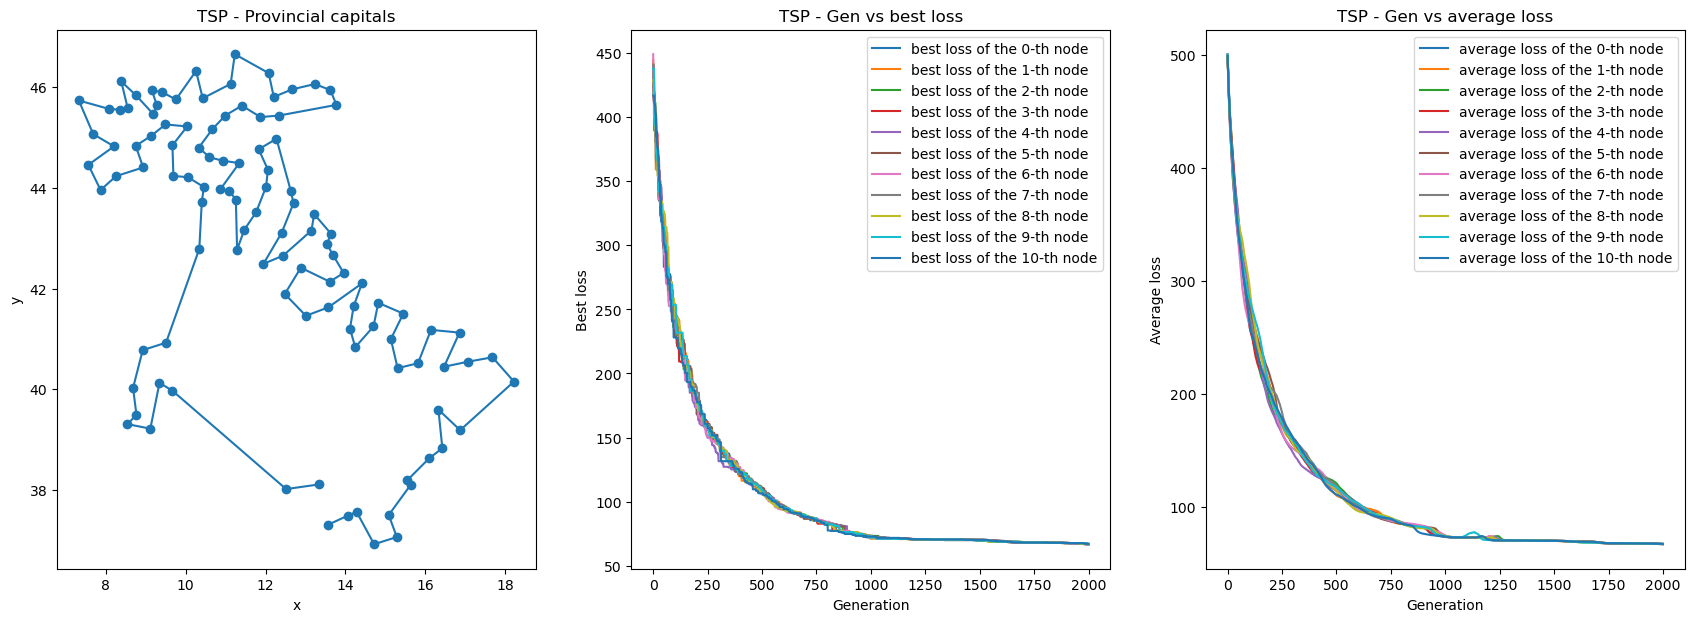

In [7]:
fig, ax=plt.subplots(1, 3, figsize=(21, 7))
ax[0].plot(x, y, marker="o")
ax[0].set_title("TSP - Provincial capitals")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
for i in range(11):
    gen=np.loadtxt(rf"NSL_SIMULATOR/OUTPUT/migr1_order/evolution{i}.dat", skiprows=1, usecols=0)
    best_loss=np.loadtxt(rf"NSL_SIMULATOR/OUTPUT/migr1_order/evolution{i}.dat", skiprows=1, usecols=1)
    av_loss=np.loadtxt(rf"NSL_SIMULATOR/OUTPUT/migr1_order/evolution{i}.dat", skiprows=1, usecols=2)
    ax[1].plot(gen, best_loss, label=rf'best loss of the {i}-th node')
    ax[1].set_title('TSP - Gen vs best loss')
    ax[1].set_xlabel('Generation')
    ax[1].set_ylabel('Best loss')
    ax[1].legend()
    ax[2].plot(gen, av_loss, label=rf'average loss of the {i}-th node')
    ax[2].set_title('TSP - Gen vs average loss')
    ax[2].set_xlabel('Generation')
    ax[2].set_ylabel('Average loss')
    ax[2].legend()


## 11 nodi (no migrazioni) - 2000 generazioni

In [64]:
x=np.loadtxt("NSL_SIMULATOR/OUTPUT/no_migr_order/cities_order.dat", skiprows=1, usecols=1)
y=np.loadtxt("NSL_SIMULATOR/OUTPUT/no_migr_order/cities_order.dat", skiprows=1, usecols=2)

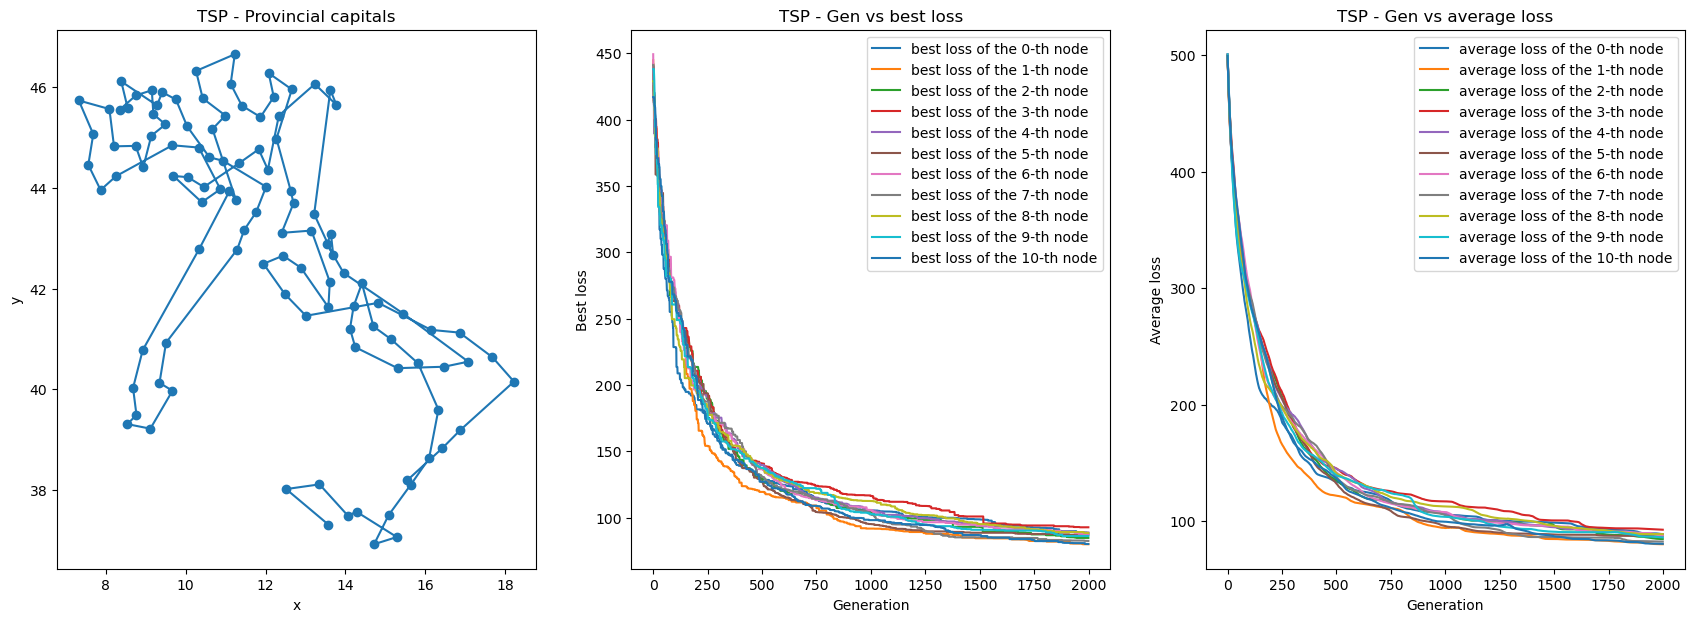

In [74]:
fig, ax=plt.subplots(1, 3, figsize=(21, 7))
ax[0].plot(x, y, marker="o")
ax[0].set_title("TSP - Provincial capitals")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
for i in range(11):
    gen=np.loadtxt(rf"NSL_SIMULATOR/OUTPUT/no_migr_order/evolution{i}.dat", skiprows=1, usecols=0)
    best_loss=np.loadtxt(rf"NSL_SIMULATOR/OUTPUT/no_migr_order/evolution{i}.dat", skiprows=1, usecols=1)
    av_loss=np.loadtxt(rf"NSL_SIMULATOR/OUTPUT/no_migr_order/evolution{i}.dat", skiprows=1, usecols=2)
    ax[1].plot(gen, best_loss, label=rf'best loss of the {i}-th node')
    ax[1].set_title('TSP - Gen vs best loss')
    ax[1].set_xlabel('Generation')
    ax[1].set_ylabel('Best loss')
    ax[1].legend()
    ax[2].plot(gen, av_loss, label=rf'average loss of the {i}-th node')
    ax[2].set_title('TSP - Gen vs average loss')
    ax[2].set_xlabel('Generation')
    ax[2].set_ylabel('Average loss')
    ax[2].legend()

# Media a blocchi - confronto prestazioni algoritmo genetico con TSP problem con e senza migrazioni

In [42]:
blocks_no_migr=np.loadtxt('NSL_SIMULATOR/OUTPUT/No_migr/mb_best_loss.dat', skiprows=1, usecols=0)
av_no_migr=np.loadtxt('NSL_SIMULATOR/OUTPUT/No_migr/mb_best_loss.dat', skiprows=1, usecols=2)
err_no_migr=np.loadtxt('NSL_SIMULATOR/OUTPUT/No_migr/mb_best_loss.dat', skiprows=1, usecols=3)

blocks_migr1=np.loadtxt('NSL_SIMULATOR/OUTPUT/migr1/mb_best_loss.dat', skiprows=1, usecols=0)
av_migr1=np.loadtxt('NSL_SIMULATOR/OUTPUT/migr1/mb_best_loss.dat', skiprows=1, usecols=2)
err_migr1=np.loadtxt('NSL_SIMULATOR/OUTPUT/migr1/mb_best_loss.dat', skiprows=1, usecols=3)

blocks_migr10=np.loadtxt('NSL_SIMULATOR/OUTPUT/migr10/mb_best_loss.dat', skiprows=1, usecols=0)
av_migr10=np.loadtxt('NSL_SIMULATOR/OUTPUT/migr10/mb_best_loss.dat', skiprows=1, usecols=2)
err_migr10=np.loadtxt('NSL_SIMULATOR/OUTPUT/migr10/mb_best_loss.dat', skiprows=1, usecols=3)

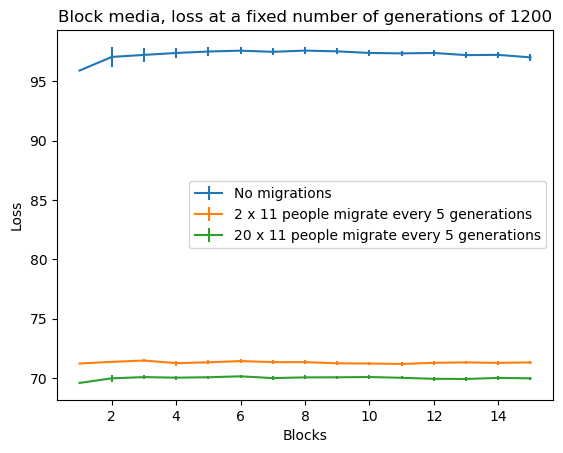

In [84]:
fig, ax = plt.subplots()
ax.errorbar(blocks_no_migr, av_no_migr, yerr=err_no_migr, label='No migrations')
ax.errorbar(blocks_migr1, av_migr1, yerr=err_migr1, label='2 x 11 people migrate every 5 generations')
ax.errorbar(blocks_migr10, av_migr10, yerr=err_migr10, label='20 x 11 people migrate every 5 generations')


ax.set_xlabel('Blocks')
ax.set_ylabel('Loss')
ax.set_title('Block media, loss at a fixed number of generations of 1200')
ax.legend()


## Commenti
### Scopo dell'esercizio e risultati aspettati
- Parallelizzare l'algoritmo implementato nell'esercitazione 9 per risolvere il TSP usando le librerie MPI. Per far sì che ogni nodo sia un continente e che dopo $N_{migr}$ generazioni avvengano delle migrazioni tra continenti.
- Verificare che ci sia un miglioramento delle prestazioni rispetto alla ricerca senza migrazioni, risolvendo il TSP tra i capoluoghi di provincia italiani.
### Risultati
- Come si può apprezzare dai grafici, dopo 2000 generazioni il percorso migliore trovato dall'algoritmo senza migrazioni, a differenza di quello trovato dall'algoritmo con migrazioni, presenta ancora degli incroci. La norma del miglior percorso trovato senza migrazioni è infatti 79.8831, contro il 66.7121 dell'algoritmo con migrazione di una persona. 
- Il metodo di migrazione scelto è stato il seguente: ogni $N_{migr}$ generazioni per un numero pari al numero di continuenti vengono scelti estraendo casualmente (estrazione del rank del nodo da una distribuzione uniforme) 2 continenti tra i quali effettuare una migrazione. Dunque, in media ogni continente scambierà ogni $N_{migr}$ generazioni 2 persone con altri continenti, anche se può capitare anche che in un continente ogni tanto non ci siano migrazioni o ce ne siano più di 2. Aumentando il numero di persone che migrano aumento l'efficienza del codice, come commenterò in seguito. Quando dico ciò in pratica mi riferisco al fatto che estratti due continenti, questi non si scambiano più due sole persone, ma 20 (10 per continente).
- Per verificare che questo miglioramento non fosse una fluttuazione statistica, è stata effettuata una media a blocchi (N=15 blocchi con M=15 passi per blocco), dove ogni passo è una esecuzione del codice a numero di generazioni fissato a 1200. Il grafico $\textit{Block media, loss at a fixed number of generations of 1200}$ mostra chiaramente che introducendo migrazioni ho un significativo miglioramento delle prestazioni e che aumentando il numero di persone che migrano ho un ulteriore miglioramento. Possiamo infatti interpretare la cosa come il fatto che aumentando la diversità genetica complessiva della popolazione globale, in realtà si stia esplorando maggiormente lo spazio delle soluzioni del TSP, portando a migliori prestazioni a parità di generazione. Avendo una maggiore potenza di calcolo a disposizione sarebbe stato interessante andare a capire quale fosse il limite dopo cui, aumentando il numero di persone che migravano, le prestazioni peggioravano o smettevano di migliorare. I risultati ottenuti sono che la miglior loss per il codice eseguito senza migrazioni è pari a $97.0028\pm 0.308627$, per quello eseguito con migrazioni di 2 persone per blocco $71.3027\pm 0.137999$ e infine per quello eseguito con migrazioni da 20 persone per blocco $69.9628\pm 0.150071$.